## Introduction

In [ ]:
!pygmentize helper_scripts/lda.py

In [ ]:
%load_ext autoreload
%autoreload 2

from helper_scripts.lda import LDA
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Setup before git push, DO NOT RUN THIS CELL IF YOU ARE NOT USING GOOGLE COLAB
'''
Change the default plotly renderer to colab 
because plotly's plot doesn't render on the 
internet outside of certain Python environments
'''
import plotly.io as pio
pio.renderers.default = 'colab'
# Rerun all cells with plotly plots after running this cell (before git commit)

## Reading The Data

In [7]:
df = pd.read_parquet('../cleaned_data/cleaned_reviews.parquet.gzip')
df.head()

,title,date,location,rating,text,title_clean,text_clean
0,"Which iPhone you should Purchase ? iPhone 8, X...",2018-12-12,India,3.0,NOTE:@ This is detailed comparison between iPh...,purchas 8 x xs,note detail comparison 8 x xs use month also s...
1,Don't buy iPhone xr from Amazon.,2018-11-17,India,1.0,Very bad experience with this iPhone xr phone....,buy,bad experi back camera find defect non functio...
2,Happy with the purchase,2019-01-27,India,5.0,Amazing phone with amazing camera coming from ...,happi purchas,amaz amaz camera come 7 plus great servic
3,Amazon is not an apple authorised reseller. Pl...,2019-05-02,India,1.0,So I got the iPhone XR just today. The product...,authoris resel pleas take note,get today product look amaz unfortun face id w...
4,Excellent Battery life and buttery smooth UI,2019-05-24,India,5.0,I've been an android user all my life until I ...,excel batteri life butteri smooth ui,android user life decid tri io love camera bat...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        3870 non-null   object        
 1   date         3870 non-null   datetime64[ns]
 2   location     3870 non-null   object        
 3   rating       3870 non-null   float32       
 4   text         3870 non-null   object        
 5   title_clean  3870 non-null   object        
 6   text_clean   3870 non-null   object        
dtypes: datetime64[ns](1), float32(1), object(5)
memory usage: 196.6+ KB


## LDA

In [96]:
from helper_scripts.lda import LDA

In [97]:
lda_model = LDA(df['text_clean'])
lda_model.filter_extremes(keep_n=10000, no_below=10, no_above = 0.2)
len(lda_model.dictionary)

624

In [98]:
it = iter(lda_model)
it = next(it)
it.insert(0, ('word', 'frequency'))
it[:30]

[('word', 'frequency'),
 ('1', 1),
 ('11', 1),
 ('12', 1),
 ('15', 1),
 ('20', 1),
 ('4', 2),
 ('4k', 1),
 ('5', 1),
 ('6', 2),
 ('64gb', 1),
 ('6s', 1),
 ('7', 2),
 ('8', 19),
 ('9', 1),
 ('almost', 2),
 ('alreadi', 1),
 ('also', 3),
 ('alway', 1),
 ('back', 1),
 ('batteri', 4),
 ('best', 3),
 ('better', 5),
 ('budget', 2),
 ('build', 1),
 ('button', 1),
 ('camera', 3),
 ('charg', 2),
 ('choic', 2),
 ('colour', 1)]

In [99]:
lda_model.fit(5)
lda_model.print_output()

Topic: 0	Coherence Score: 0.4781
Words: 0.039*"best" + 0.018*"batteri" + 0.017*"super" + 0.016*"use" + 0.015*"camera" + 0.015*"charg" + 0.014*"awesom" + 0.014*"buy" + 0.013*"product" + 0.013*"it"

########

Topic: 1	Coherence Score: 0.5928
Words: 0.029*"batteri" + 0.024*"best" + 0.023*"use" + 0.022*"face" + 0.020*"one" + 0.015*"life" + 0.013*"camera" + 0.013*"ever" + 0.013*"perform" + 0.012*"product"

########

Topic: 2	Coherence Score: 0.4107
Words: 0.064*"awesom" + 0.031*"money" + 0.022*"valu" + 0.020*"use" + 0.018*"batteri" + 0.015*"product" + 0.014*"camera" + 0.014*"worth" + 0.013*"go" + 0.012*"overal"

########

Topic: 3	Coherence Score: 0.3928
Words: 0.088*"product" + 0.055*"batteri" + 0.052*"nice" + 0.043*"camera" + 0.038*"great" + 0.037*"life" + 0.033*"qualiti" + 0.032*"amaz" + 0.028*"excel" + 0.024*"love"

########

Topic: 4	Coherence Score: 0.5986
Words: 0.025*"get" + 0.021*"camera" + 0.015*"use" + 0.015*"price" + 0.014*"android" + 0.013*"excel" + 0.013*"work" + 0.011*"batter

In [100]:
lda_model.visualize_topics_

tuning: 100%|██████████| 59/59 [12:00<00:00, 12.22s/it, max_coherence_score=0.505, best_params={'num_topics': 6, 'alpha': 'symmetric', 'beta': 'symmetric'}]


Finished hyperparameter tuning, model updated!


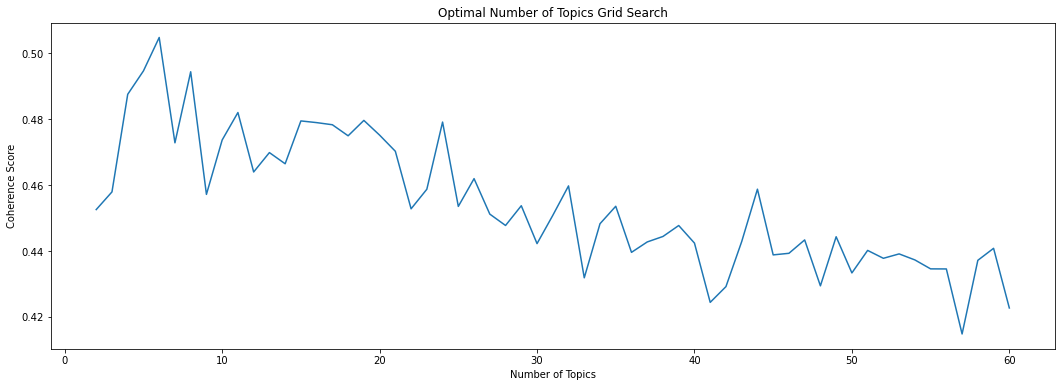

In [112]:
lda_model.find_best_num_topics()

In [113]:
best_k = lda_model.best_params_["num_topics"]

lda_model.tune(num_topic_range=range(best_k -2, best_k + 3, 1))

tuning: 100%|██████████| 210/210 [25:22<00:00,  7.25s/it, max_coherence_score=0.543, best_params={'num_topics': 6, 'alpha': 'asymmetric', 'beta': 0.75}]


Finished hyperparameter tuning, model updated!


In [ ]:
best_k = lda_model.best_params_["num_topics"]
alpha_range = list(np.arange(0.0, 1.1, 0.1))
alpha_range.append("symmetric")
alpha_range.append("asymmetric")
beta_range = list(np.arange(0.55, 1.01, 0.05))
beta_range.append("symmetric")

lda_model.tune(num_topic_range=range(best_k -1, best_k + 2, 1), alpha_range=alpha_range, beta_range=beta_range)

tuning:  11%|█         | 48/429 [06:11<1:01:54,  9.75s/it, max_coherence_score=0.503, best_params={'num_topics': 5, 'alpha': 0.0, 'beta': 0.7000000000000002}]

In [114]:
lda_model.visualize_topics_

In [65]:
lda_model.coherence_score_

0.328912040262948